# Installing Required Libraries

The following Python libraries are required for this project:

1. **pandas**: For data manipulation and analysis.
2. **matplotlib**: For creating static, interactive, and animated visualizations.
3. **seaborn**: For statistical data visualization, built on top of matplotlib.
4. **scikit-learn**: For machine learning and data science tasks.

Run the code cell below to install these libraries if they are not already installed.


In [18]:
# Install necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

### Import Required Libraries

The following Python libraries are imported for:
- Numerical computations (NumPy)
- Data manipulation (Pandas)
- Data visualization (Seaborn and Matplotlib)


In [27]:
# Importing necessary libraries
import numpy as np           # For numerical computations
import pandas as pd          # For data manipulation and analysis
import seaborn as sns        # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.preprocessing import StandardScaler

<h1 style="color:pink;">1. Data loading</h1>
# Loading and Displaying the Dataset

We are using the `pandas` library to load a CSV file into a DataFrame and display its first five rows.

### Steps:
1. Import the `pandas` library.
2. Use the `pd.read_csv()` function to load the file `data.csv`.
3. Call the `.head()` method to view the first five rows of the dataset.


In [28]:
# Load the CSV file into a DataFrame
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Display the first 5 rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h1 style="color:pink;">2.Data Exploration Analysis</h1>

**View basic information**

The following code displays the information about the dataset, including the number of non-null entries, the data types of each column, and the memory usage. This helps to quickly understand the structure of the data and identify any missing values or data type issues.

In [21]:
# Display data information
print("Data Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

### Display Basic Statistics of the Dataset

The following code provides a summary of the dataset's basic statistics. It includes measures such as:

- Count of non-null values
- Mean, standard deviation (std)
- Minimum and maximum values
- Percentile values (25%, 50%, 75%)

This helps to understand the distribution and central tendency of the dataset's numerical columns.


In [22]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

### Display Class Distribution

The following code displays the distribution of classes in the target column (`diagnosis`). It provides the count of each unique value in the column, helping to identify imbalances in the dataset.

This is particularly useful for classification problems, as it shows the number of instances for each class label.


In [23]:
# Display class distribution
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())



Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


<h1 style="color:pink;">3.Data Preprocessing</h1>

Encode 'diagnosis' as binary
### Mapping Target Column Values

The following code maps the values in the `diagnosis` column to numerical values:

- **M** (Malignant) is mapped to `1`
- **B** (Benign) is mapped to `0`

This transformation is essential for machine learning models, which require numerical inputs for processing. After mapping, the updated column is displayed.


In [24]:
# Map 'diagnosis' values to numerical format
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the transformed 'diagnosis' column
df["diagnosis"]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Handling Missing Values in the Dataset

The following code helps identify and handle missing values:

1. **Identify Missing Values**:
   - The code prints the count of missing values for each column using `df.isnull().sum()`.

2. **Drop Missing Values**:
   - Rows containing missing values are removed from the dataset using `df.dropna()`.

This ensures that the dataset is clean and ready for further analysis or machine learning tasks.


In [25]:
# Identify and print missing values for each column
print("Missing Values Per Column:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


Missing Values Per Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

### Checking Unique Values in the 'diagnosis' Column

The following code prints the unique values in the `diagnosis` column after encoding:

- This step ensures that the encoding process was successful.
- The output will confirm the presence of the intended numerical values (`1` for Malignant and `0` for Benign).

This verification step is crucial to validate data preparation before proceeding with further analysis or modeling.


In [30]:
# Print unique values in 'diagnosis' after encoding
print("\nUnique values in 'diagnosis' after encoding:")
print(df['diagnosis'].unique())



Unique values in 'diagnosis' after encoding:
['M' 'B']


### Feature Scaling and Label Separation

This section of the code performs the following steps:

1. **Separate Features and Labels**:
   - `X`: Contains all features except the `id` and `diagnosis` columns.
   - `y`: Contains the target variable (`diagnosis`).

2. **Standardize Features**:
   - The `StandardScaler` from `sklearn` is applied to scale the features in `X` to have a mean of 0 and a standard deviation of 1. This ensures all features are on a similar scale, which is crucial for many machine learning algorithms.

3. **Create a Scaled DataFrame**:
   - A new DataFrame, `X_scaled_df`, is created to hold the scaled feature values with their original column names.

4. **Display a Sample**:
   - The first few rows of the scaled feature DataFrame are displayed using `head()`.


In [32]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display a sample of the scaled features
print("\nScaled Feature Sample:")
print(X_scaled_df.head())



Scaled Feature Sample:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area

C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\anndi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


<h1 style="color:pink;">4.Data Visualization </h1>

### Visualizing Feature Distributions with Histograms

The following code generates histograms for all numerical features in the dataset:

1. **Histogram Plot**:
   - Each numerical feature in the DataFrame is plotted as a histogram.
   - The number of bins for each histogram is set to 15 for detailed visualization.

2. **Customization**:
   - The color of the bars is set to `skyblue` for clarity.
   - The edges of the bars are outlined in `black` for contrast.
   - A title, "Histograms of Feature Distributions," is added for better understanding.

3. **Display**:
   - The histograms provide an overview of the data distributions for each feature.

This step is useful for understanding the spread, skewness, and potential outliers in the dataset.


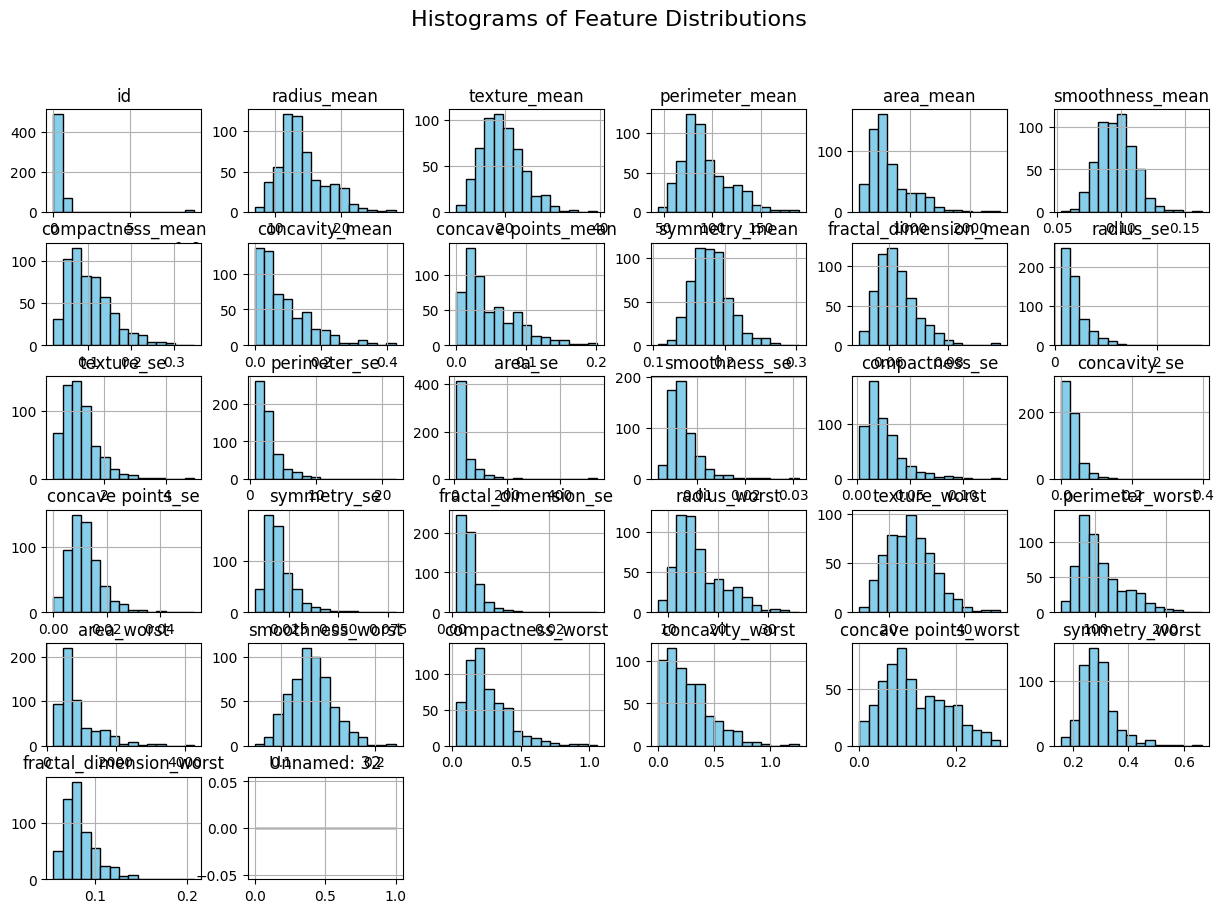

In [33]:
# Plot histograms for all numerical features
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()


### Visualizing Feature Distributions with Boxplots

The following code creates boxplots for all numerical features in the dataset:

1. **Boxplot Creation**:
   - A boxplot is created for each numerical feature in the DataFrame, excluding the `id` and `diagnosis` columns.
   - Boxplots provide insight into the spread, median, and presence of potential outliers for each feature.

2. **Customization**:
   - The figure size is set to `(12, 8)` for better readability.
   - The x-axis labels are rotated by 90 degrees for better alignment.

3. **Title**:
   - A title, "Boxplots of Features," is added to describe the plot.

4. **Display**:
   - The boxplots are displayed to facilitate feature comparison and analysis of potential anomalies in the data.


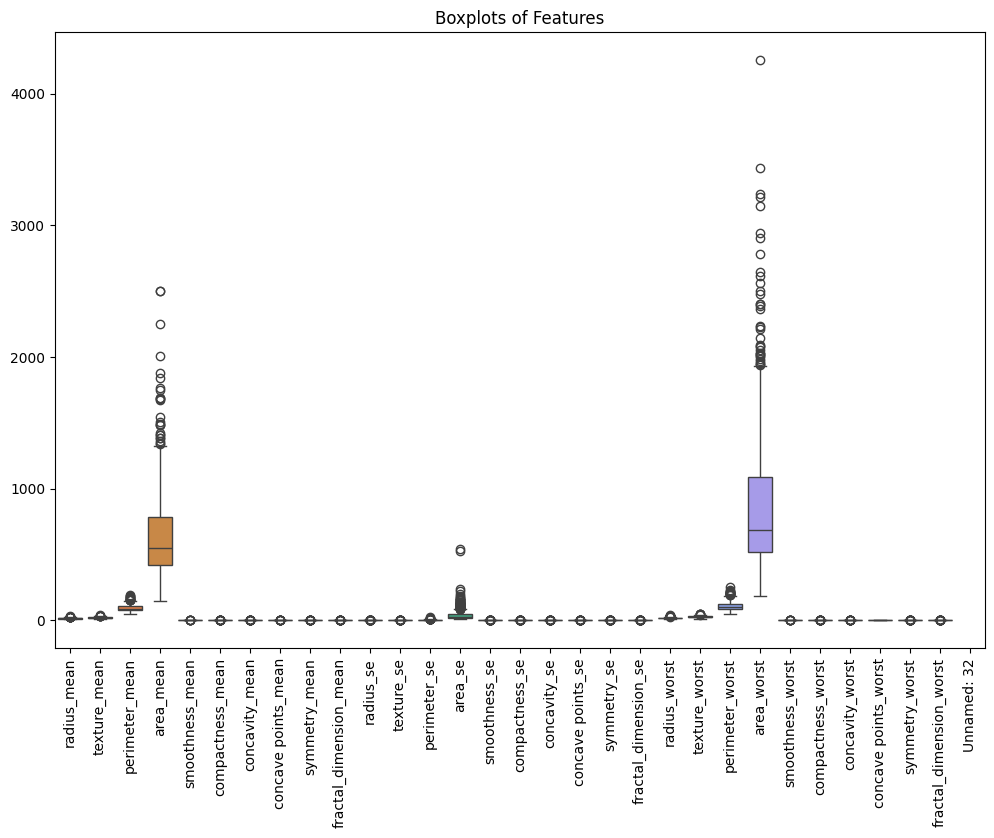

In [34]:
# Plot boxplots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['id', 'diagnosis']))
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()


### Visualizing Feature Correlations with a Heatmap

The following code generates a heatmap to visualize the correlations between features in the dataset:

1. **Correlation Matrix**:
   - The `corr()` method is used to calculate the Pearson correlation coefficients for all numerical features in the DataFrame.

2. **Heatmap Plot**:
   - The heatmap is plotted using `seaborn` with the following customizations:
     - The `coolwarm` colormap is used for a visually appealing gradient from negative to positive correlations.
     - `vmin=-1` and `vmax=1` set the range of the correlation values.
     - The `annot=False` parameter avoids cluttering the heatmap with text annotations.

3. **Figure Size**:
   - The figure size is set to `(15, 10)` for better readability.

4. **Title**:
   - A title, "Feature Correlation Matrix," is added to describe the plot.

5. **Display**:
   - The heatmap highlights relationships between features, helping to identify strong positive or negative correlations that might influence model performance.


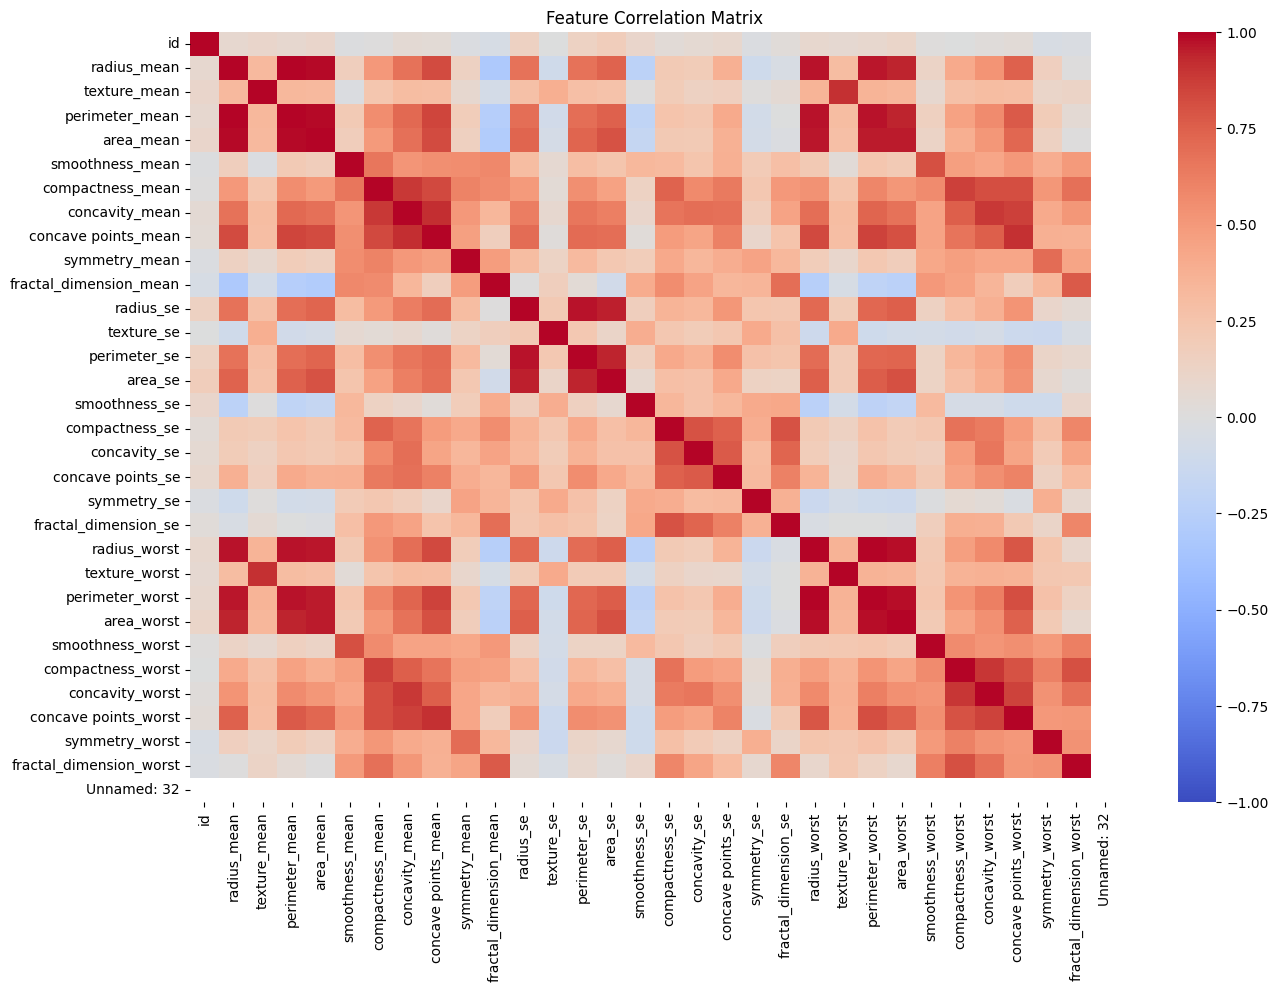

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# If there are non-numeric columns, select only numeric ones
df_numeric = df.select_dtypes(include=['number'])

# Plot feature correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()
